In [ ]:
pip install ipympl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib widget

In [2]:
eeg_path_file = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\EEG.xlsx"
coords_path_file = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\EEG_3D_coordinates.xlsx"

In [3]:
eeg_file_dict = pd.read_excel(eeg_path_file, sheet_name=None)
eeg_file_dict.keys()

dict_keys(['coherence_motorimagery_alpha', 'coherence_chbmit_interictal', 'coherence_chbmit_ictal'])

In [4]:
coords_file_dict = pd.read_excel(coords_path_file, sheet_name=None)
coords_file_dict.keys()

dict_keys(['Motor_Imagery', 'CHB_MIT', 'Sleep_EDF'])

In [5]:
motor_df = eeg_file_dict[list(eeg_file_dict.keys())[0]]

motor_df.set_index("Unnamed: 0", inplace=True, drop=True)
motor_df

,F3,F4,C3,C4,P3,P4,O1,O2
Unnamed: 0,,,,,,,,
F3,1.00,0.58,0.46,0.40,0.22,0.18,0.12,0.10
F4,0.58,1.00,0.44,0.39,0.20,0.17,0.11,0.09
C3,0.46,0.44,1.00,0.62,0.25,0.22,0.13,0.11
C4,0.40,0.39,0.62,1.00,0.23,0.21,0.12,0.10
P3,0.22,0.20,0.25,0.23,1.00,0.55,0.28,0.20
P4,0.18,0.17,0.22,0.21,0.55,1.00,0.27,0.19
O1,0.12,0.11,0.13,0.12,0.28,0.27,1.00,0.48
O2,0.10,0.09,0.11,0.10,0.20,0.19,0.48,1.00


In [6]:
coords_df = coords_file_dict[list(coords_file_dict.keys())[0]]

coords_df.set_index("Canal", inplace=True, drop=True)
coords_df

,x,y,z
Canal,,,
F3,-0.45,0.6,0.65
F4,0.45,0.6,0.65
C3,-0.55,0.0,0.83
C4,0.55,0.0,0.83
P3,-0.45,-0.6,0.65
P4,0.45,-0.6,0.65
O1,-0.30,-0.9,0.35
O2,0.30,-0.9,0.35


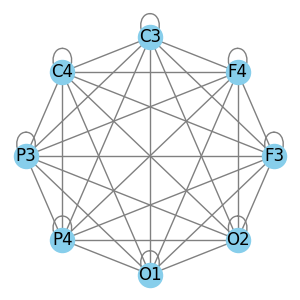

In [12]:
plt.figure(figsize=(3, 3))
G = nx.from_pandas_adjacency(motor_df)
nx.draw_circular(G, with_labels=True, node_color='skyblue', edge_color='gray')

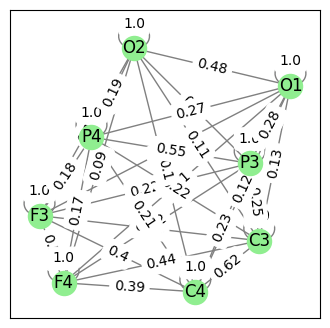

In [8]:
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray')
# Mostrar los pesos en las aristas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [ ]:
%matplotlib notebook

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.plot([1,2,3],[4,5,6])
plt.show()


<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'Red de Conectividad EEG (3D)')

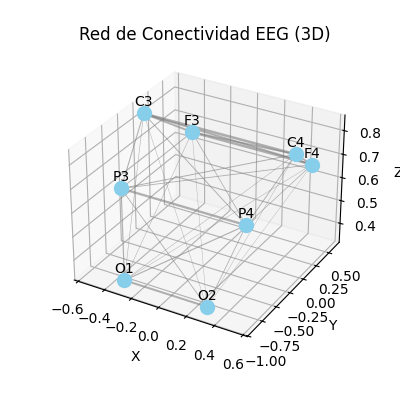

In [11]:
# Crear diccionario de posiciones 3D
pos3d = {canal: (coords_df.loc[canal, 'x'],
                 coords_df.loc[canal, 'y'],
                 coords_df.loc[canal, 'z']) for canal in coords_df.index}

# --- Dibujar en 3D ---
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Dibujar nodos
for node, (x, y, z) in pos3d.items():
    ax.scatter(x, y, z, s=100, color='skyblue')
    ax.text(x, y, z+0.03, node, fontsize=10, ha='center')

# Dibujar aristas (con pesos como grosor)
for i, j, data in G.edges(data=True):
    x = [pos3d[i][0], pos3d[j][0]]
    y = [pos3d[i][1], pos3d[j][1]]
    z = [pos3d[i][2], pos3d[j][2]]
    ax.plot(x, y, z, color='gray', alpha=0.6, linewidth=data['weight'] * 3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Red de Conectividad EEG (3D)')
# plt.show()


[Text(0.5, 23.52222222222222, 'channels'),
 Text(50.722222222222214, 0.5, 'channels')]

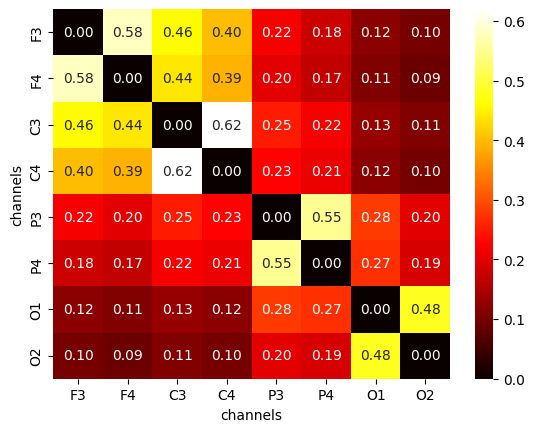

In [12]:
ax = sns.heatmap(motor_df.values-np.eye(len(motor_df)), 
                 annot=True, cmap='hot', fmt=".2f", 
                 xticklabels=motor_df.columns, yticklabels=motor_df.index)
ax.set(xlabel="channels", ylabel="channels")

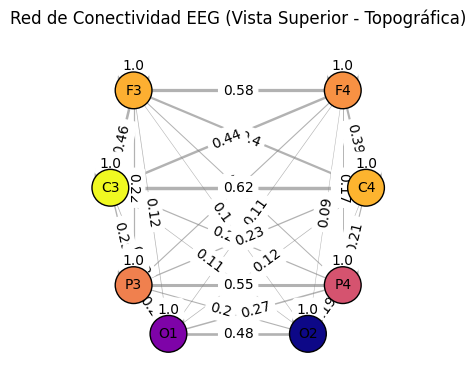

In [13]:
# Crear diccionario de posiciones 3D
pos2d = {canal: (coords_df.loc[canal, 'x'],
                 coords_df.loc[canal, 'y']) for canal in coords_df.index}

# --- Calcular grados ponderados ---
grados = dict(G.degree(weight='weight'))

# Normalizar grados para mapear colores
min_g, max_g = min(grados.values()), max(grados.values())
node_colors = [(grados[n] - min_g) / (max_g - min_g + 1e-9) for n in G.nodes()]

# --- Dibujar red topográfica ---
plt.figure(figsize=(4, 4))
nx.draw_networkx_nodes(
    G,
    pos2d,
    node_size=700,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    edgecolors='k'
)
nx.draw_networkx_labels(G, pos2d, font_size=10, font_color='black')

# Dibujar aristas con grosor proporcional al peso
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G,
    pos2d,
    edgelist=[(u, v) for u, v, d in edges],
    width=[d['weight'] * 4 for u, v, d in edges],
    edge_color='gray',
    alpha=0.6
)

# Dibujar aristas con valor del peso
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos2d, edge_labels=labels);

plt.title('Red de Conectividad EEG (Vista Superior - Topográfica)', pad=20)
plt.axis('off')
plt.show()

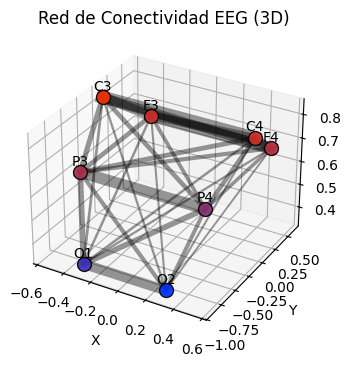

In [14]:
# Crear diccionario de posiciones 3D
pos3d = {canal: (coords_df.loc[canal, 'x'],
                 coords_df.loc[canal, 'y'],
                 coords_df.loc[canal, 'z']) for canal in coords_df.index}

# --- Calcular grados ponderados ---
grados = dict(G.degree(weight='weight'))

# Normalizar grados para mapear colores
min_g, max_g = min(grados.values()), max(grados.values())
node_colors = [(grados[n] - min_g) / (max_g - min_g + 1e-9) for n in G.nodes()]

# --- Dibujar en 3D ---
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Dibujar nodos
for node, (x, y, z) in pos3d.items():
    ax.scatter(x, y, z, 
               c=[[node_colors[list(G.nodes()).index(node)], 0.2, 1 - node_colors[list(G.nodes()).index(node)]]],
               edgecolors='k',
               alpha=0.9, 
               s=100)
    ax.text(x, y, z+0.03, node, fontsize=10, ha='center')

# Dibujar aristas (con pesos como grosor)
for i, j, data in G.edges(data=True):
    x = [pos3d[i][0], pos3d[j][0]]
    y = [pos3d[i][1], pos3d[j][1]]
    z = [pos3d[i][2], pos3d[j][2]]
    w = data['weight']
    ax.plot(x, y, z, color='k', alpha=0.4, linewidth=w * 15)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Red de Conectividad EEG (3D)')
plt.show()
